In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('prepared_internet_service_churn.csv')

In [3]:
df.head(10)

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.140000,0,8.4,2.3,0,0
1,0,0,8.22,0,0.716039,0,0.0,0.0,0,1
2,1,0,8.91,16,0.000000,0,13.7,0.9,0,1
3,0,0,6.87,21,0.716039,1,0.0,0.0,0,1
4,0,0,6.39,0,0.716039,0,0.0,0.0,0,1
5,1,1,11.94,32,1.380000,0,69.4,4.0,0,0
6,0,0,8.96,18,0.000000,0,21.3,2.0,0,1
7,0,0,5.48,14,0.716039,1,0.0,0.0,0,1
8,0,0,8.54,0,0.716039,0,0.0,0.0,0,1
9,0,0,8.33,0,0.716039,0,0.0,0.0,0,1


In [4]:
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:

for kernel in ['rbf', 'linear', 'poly', 'sigmoid']:
    svc = SVC(kernel=kernel)
    svc.fit(X_train, y_train)
    score = svc.score(X_test, y_test)
    print(f"Kernel: {kernel}, Score: {score}")

Kernel: rbf, Score: 0.8542372881355932
Kernel: linear, Score: 0.8181943964026288
Kernel: poly, Score: 0.8311310965063992
Kernel: sigmoid, Score: 0.7461777931511587


In [6]:
param_grid = {      
    'gamma': ['scale', 0.01, 0.001],  
    'kernel': ['rbf', 'linear', 'poly']
}
grid = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Найкращі параметри:", grid.best_params_)

Найкращі параметри: {'gamma': 'scale', 'kernel': 'rbf'}


In [7]:
model_svm = grid.best_estimator_


y_pred = model_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8542372881355932
Precision: 0.8660770688566014
Recall: 0.8675018982536067
F1 Score: 0.8667888980211165


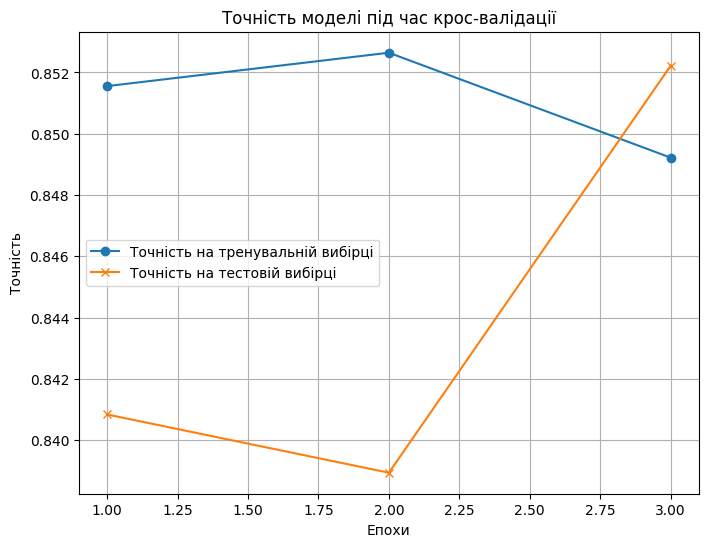

In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score

train_accuracies = cross_val_score(model_svm, X_train, y_train, cv=3, scoring='accuracy')
test_accuracies = cross_val_score(model_svm, X_test, y_test, cv=3, scoring='accuracy')


epochs = np.arange(1, len(train_accuracies) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracies, label='Точність на тренувальній вибірці', marker='o')
plt.plot(epochs, test_accuracies, label='Точність на тестовій вибірці', marker='x')
plt.title('Точність моделі під час крос-валідації')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)
plt.show()

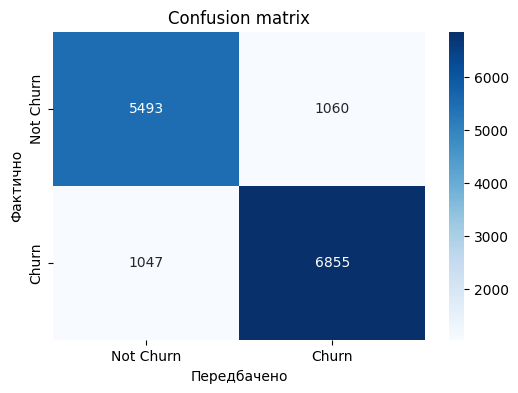

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion matrix')
plt.xlabel('Передбачено')
plt.ylabel('Фактично')
plt.show()

In [10]:
import pickle


with open('model_svm.pkl', 'wb') as file:
    pickle.dump(model_svm, file)



In [12]:
y_train_df = pd.DataFrame(y_train, columns=['churn'])  
y_test_df = pd.DataFrame(y_test, columns=['churn'])
y_pred_df = pd.DataFrame(y_pred, columns=['churn']) 

y_train_df.to_csv('y_train_svm.csv', index=False)
y_test_df.to_csv('y_test_svm.csv', index=False)
y_pred_df.to_csv('y_pred_svm.csv', index=False)

